<a href="https://colab.research.google.com/github/RamalS/3DCubicWordle/blob/main/SU_LV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detekcija objekata

Detekcija objekata predstavlja lokalizaciju i klasifikaciju većeg broja objekata na slici. Uobičajeno je koristiti pravokutne granične okvire (*bounding boxes*) poravnate s rubovima slike za lokalizaciju objekata.

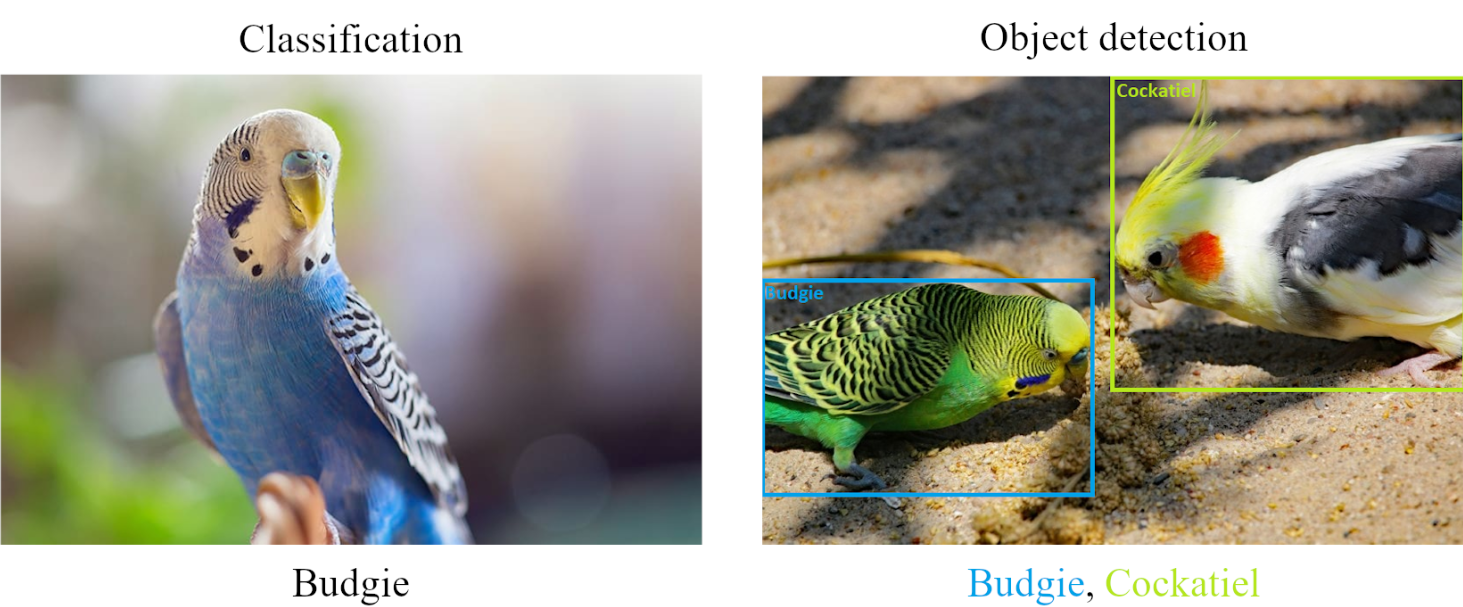

### Granični okvir

Granični okvir je poravnat s rubovima slike, stoga su nam dosta 4 broja za definiranje lokacije istog, a ona se najčešće definira na jedan od dva načina:
 - koordinate centra i dimenzije graničnog okvira,
 - koordinate gornjeg lijevog kuta i koordinate donjeg desnog kuta.

Osim lokacije, potrebna nam je i klasa objekta na kojeg se odnosi granični okvir. Odnosno, potrebno nam je 5 brojeva za definiranje jednog graničnog okvira.

Prilikom detekcije, još jedan broj dolazi uz ovih 5, pouzdanost (*confidence*) predviđenog graničnog okvira. Ovaj broj nam je bitan za potiskivanje nemaksimalnih vrijednosti (*non-maximum supression* - **NMS**) i kod evaluacije modela.

### Evaluacija lokalizacije - IoU

Za evaluaciju lokalizacije objekta koristi se metrika „presjek preko unije” (*Intersection Over Union* - IoU) ili Jaccard indeks.

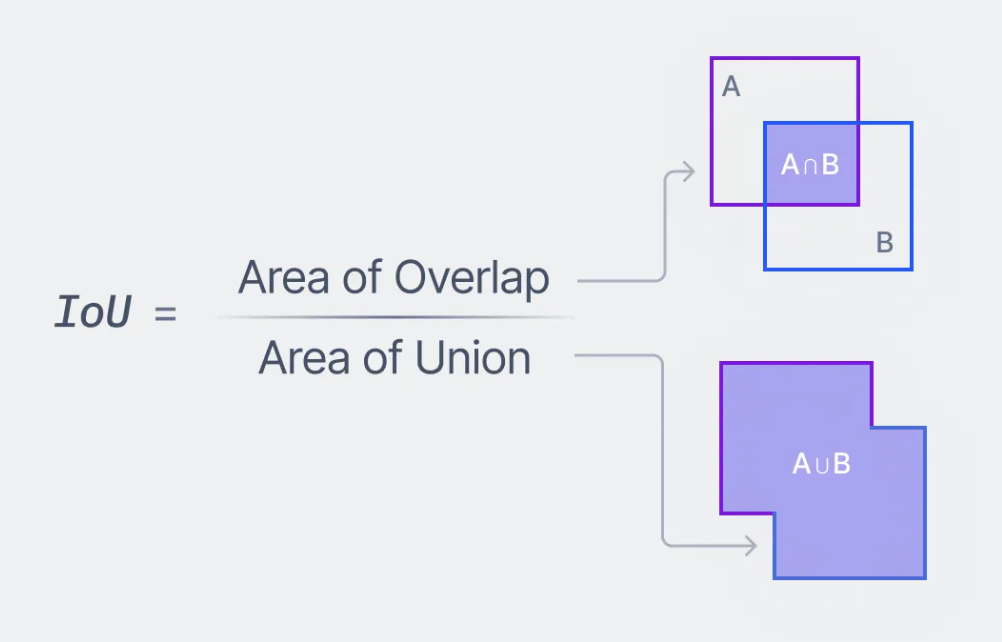


### Potiskivanje nemaksimalnih vrijednost (NMS)

Često model detektira velik broj objekata na istom mjestu, odnosno više puta detektira isti objekt pa je potrebno filtrirati suvišne detekcije - od svih detekcija ostaviti samo najbolju detekciju - potiskivanje nemaksimalnih vrijednosti. Prije svega, potrebno je odlučiti prag pouzdanosti (*confidence threshold*) i izbaciti sve granične okvire manje pouzdanosti. Zatim je potrebno izbaciti višestruke granične okvire za isti objekt. Ovo se može učiniti tako da se definira prag IoU za koji smatramo da granični okviri opisuju isti objekt. Primjerice, ako nam je taj prag 0.5, dva granična okvira opisuju isti objekt ako im je vrijednost IoU 0.5 ili veća. S ovako definiranim pragom, možemo izbaciti sve granične okvire koji opisuju isti objekt osim onog s najvećom pouzdanošću.

### Evaluacija detektora objekata

True Positive (TP): detekcija za koju IoU predviđenog BB i stvarnog BB ≥ praga.

False Positive (FP): detekcija koja nema IoU sa stvarnim BB ili je IoU sa stvarnim BB manji od praga. Ovdje pripadaju i detekcije čiji BB imaju IoU sa stvarnim BB veći od praga, ali klasa je pogrešno predviđena.

False Negative (FN): ako je objekt prisutan na sceni (postoji stvarni BB), ali ne postoji detekcija koja ga je otkrila.

Preciznost (*precision*) je sposobnost modela da identificira prisutne objekte. To je postotak ispravnih pozitivnih predviđanja.
$$preciznost = \frac{TP}{TP + FP}$$

Odziv (*recall*) je mjera modela koliko pronalazi sve prisutne objekte (sve stvarne granične pravokutnike). To je postotak točno otkrivenih među svim prisutnim objektima.
$$odziv = \frac{TP}{TP + FN}$$

Krivulja preciznost-odziv (*precision-recall*) je uobičajen način evaluacije performansi detektora objekata pri čemu se računa preciznost i odziv, ali za različite vrijednosti praga pouzdanost procjene. Vrijednosti se računaju za svaku klasu zasebno te se grafički prikazuju 2D grafom. Prosječna preciznost (*Average Precision* - AP) predstavlja površinu ispod krivulje. U praksi se češće koristi monotona aproksimacija krivulje.

Srednja prosječna preciznost (*mean average precision* - mAP) predstavlja srednju vrijednost AP-a svih klasa. Također se definira IoU prag za koji se računa mAP. Npr. mAP\@0.5 za IoU prag od 0.5.

Više o metrikama u detekciji objekata možete vidjeti [ovdje](https://github.com/rafaelpadilla/Object-Detection-Metrics)

## YOLO v3

[YOLO v3](https://pjreddie.com/media/files/papers/YOLOv3.pdf) je konvolucijska neuronska mreža za detekciju objekata. Spada u skupinu tzv. *One-stage* detektora jer se izravno dobijaju predikcije za klasifikaciju i lokalizaciju. YOLO v3 koristi Darknet-53 za izvlačenje značajki te 3 glave za predikciju graničnih okvira. Shema ove mreže za ulaznu sliku veličine 608x608 prikazana je na slici. 3 glave koriste se za predikciju velikih, srednje velikih i malih objekata na slici.

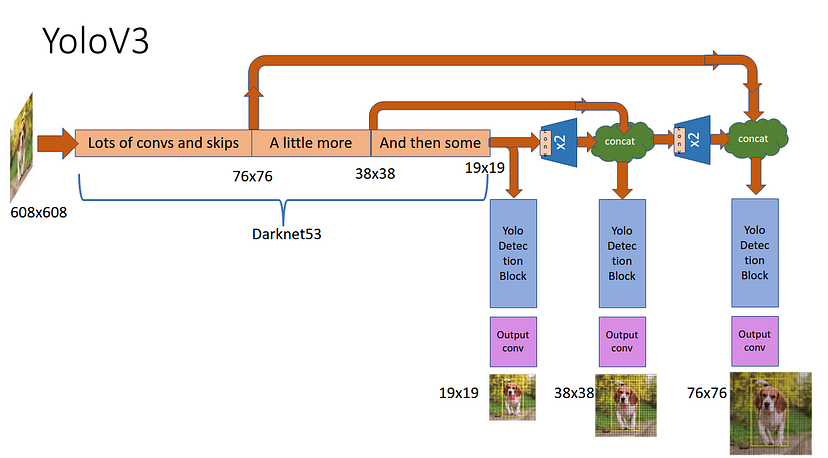

Za svaki "piksel" izlaza glave, uzimaju se 3 unaprijed definirana granična pravokutnika (*anchor box*). Za svaki od tih graničnih pravokutnika, predviđa se 4 + 1 + *c* vrijednosti. 4 vrijednosti definiraju lokaciju predviđenog graničnog okvira relativno na taj granični pravokutnik. Nakon toga je ocjena *objektnosti* graničnog okvira (veći broj označava veću šansu da se tu nalazi nekakav objekt). *c* vrijednosti na kraju definiraju vjerojatnosti za svaku pojedinu klasu. Ako uzmemo izlaz za velike objekte s prethodne sheme, on će biti oblika 19 x 19 x (3 \* (4 + 1 + *c*)). Naravno, za svaki *anchor box* se bira najveća vrijednost za predviđenu klasu. Na kraju nam ostane 19 \* 19 \* 3 predviđenih graničnih okvira. Na njih se na posljetku primjenjuje NMS.


## YOLO v5

[YOLOv5](https://arxiv.org/html/2407.20892v1) je konvolucijska neuronska mreža za detekciju objekata. Također pripada skupini One-stage detektora. YOLOv5 koristi CSPDarknet (Cross Stage Partial Darknet) kao backbone za ekstrakciju značajki, zatim PANet za agregaciju značajki te tri izlazne glave za predikciju objekata različitih veličina (veliki, srednji i mali objekti).


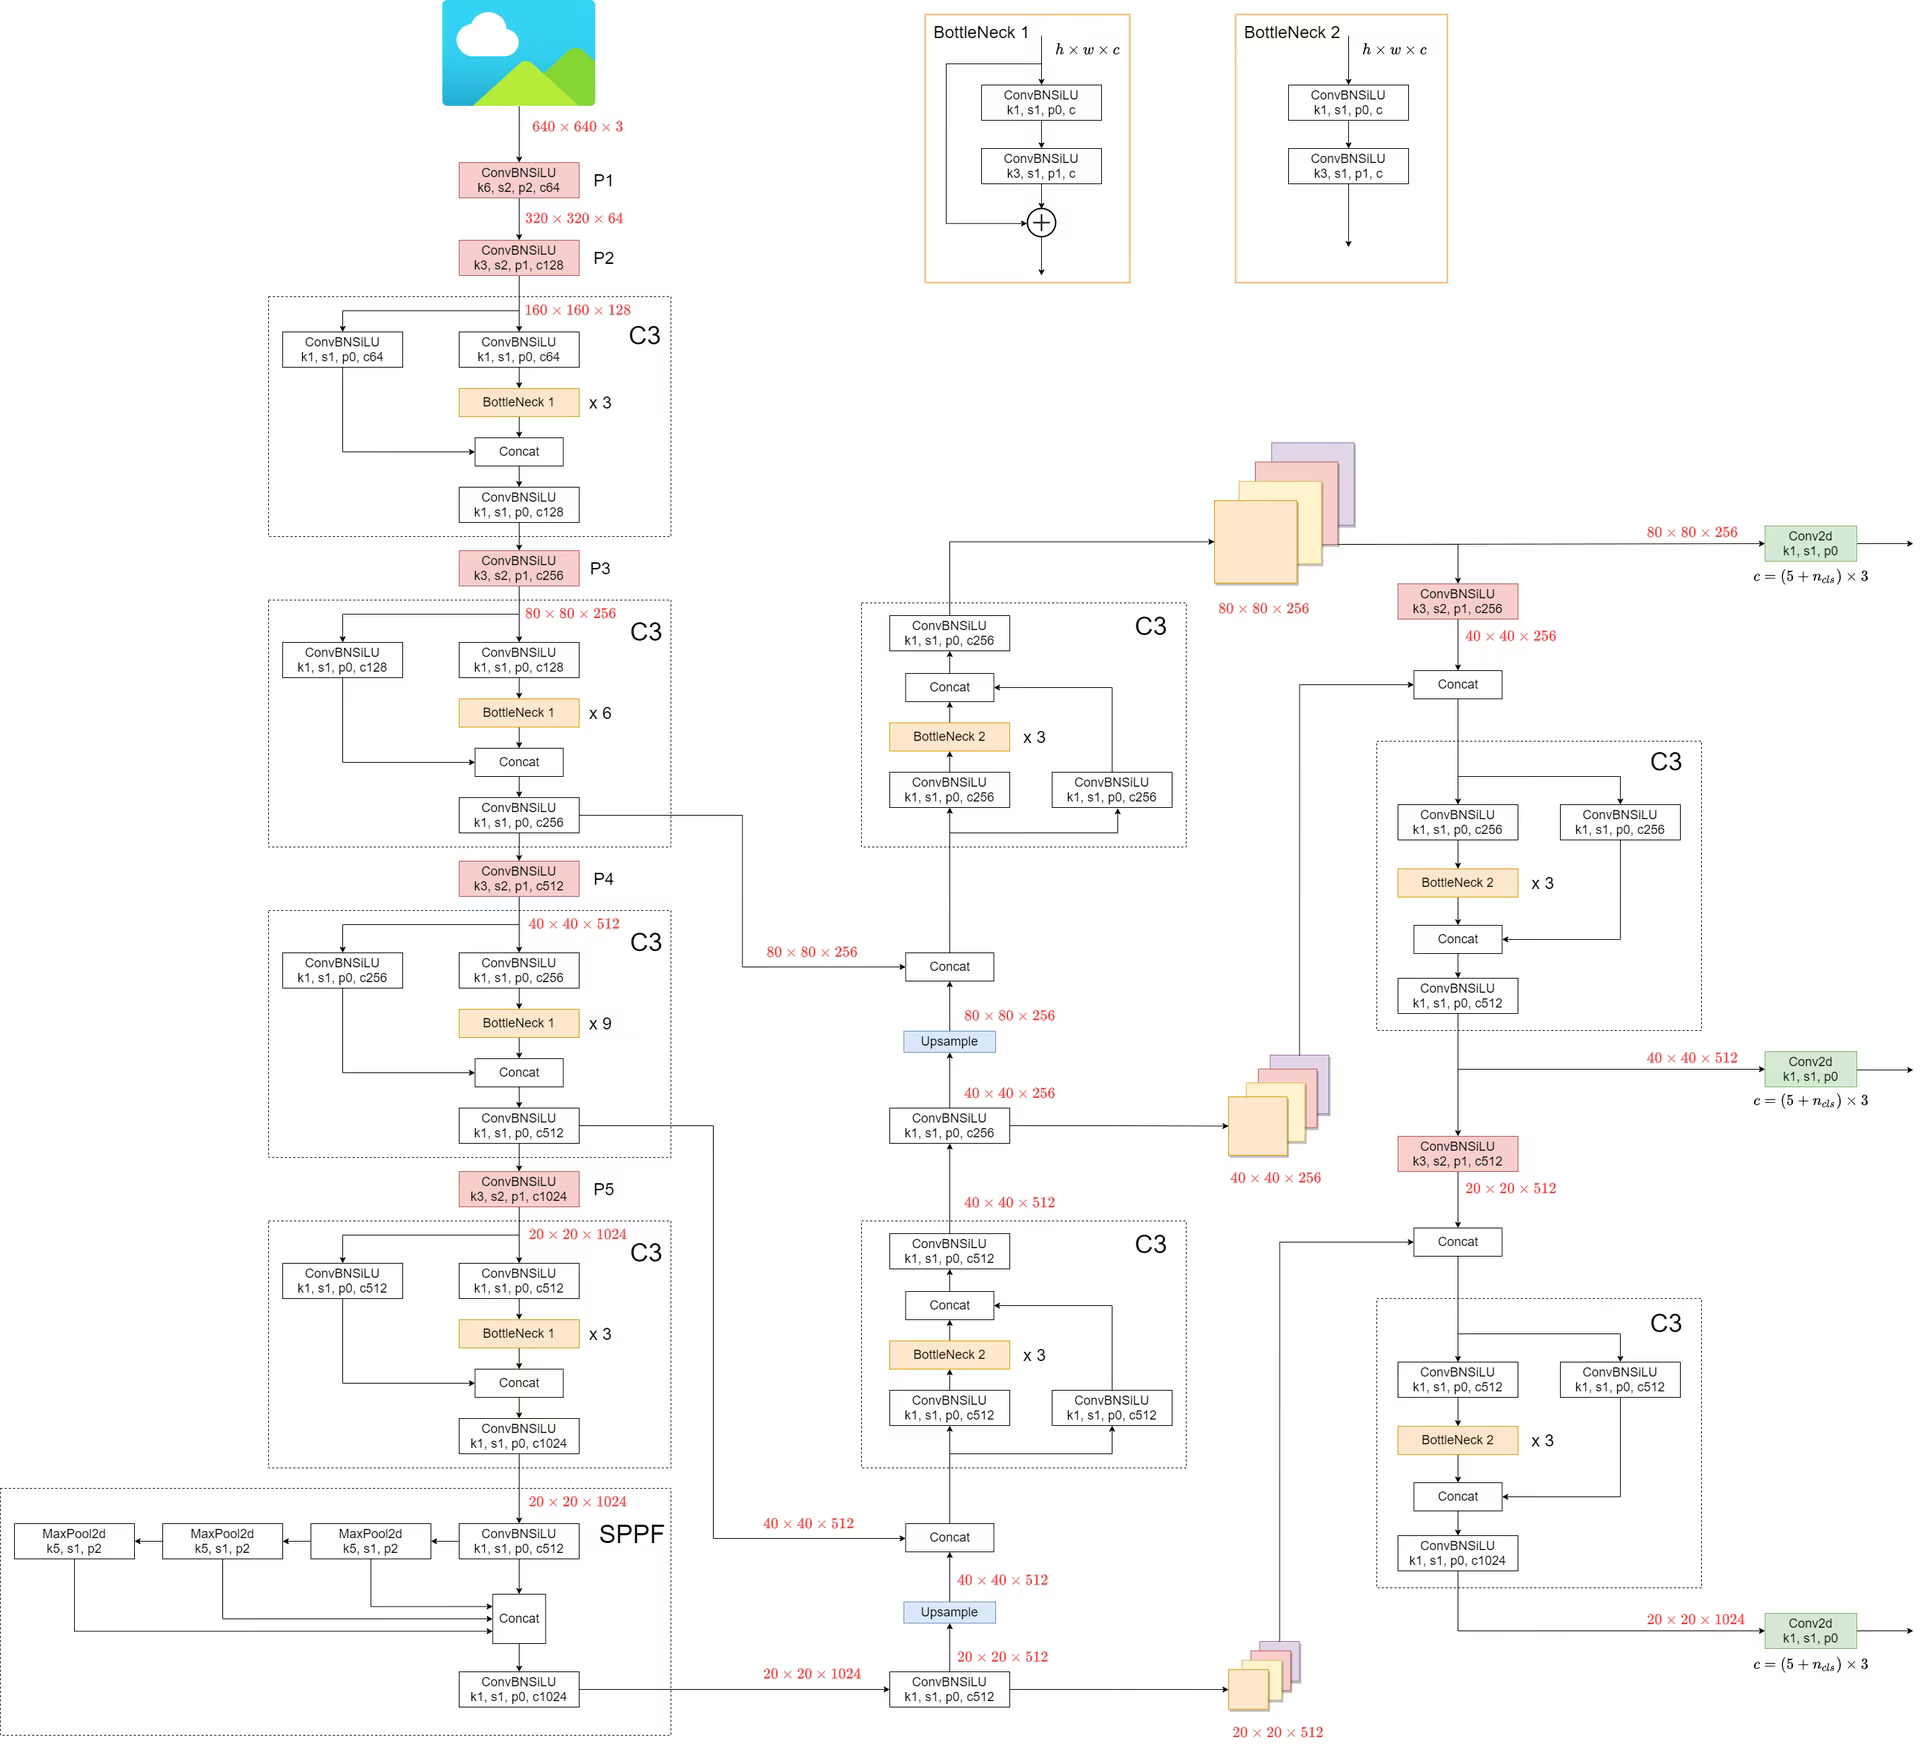

YOLOv5 uvodi dodatne optimizacije poput mosaic augmentacije, auto-learning anchor boxova, bržu i modularniju implementaciju u PyTorchu, kao i SiLU aktivacijsku funkciju umjesto ReLU. YOLOv5 dolazi u više varijanti (npr. yolov5s, yolov5m, yolov5l, yolov5x) koje se razlikuju po veličini modela i točnosti.

## COCO podaktovni skup

COCO (Common Objects in Context) je opsežan skup podataka za računalni vid, najčešće korišten u zadacima detekcije objekata, segmentacije, keypoint detekcije i opisivanja slika (image captioning). Sadrži preko 330.000 slika, od čega je oko 200.000 anotirano, s više od 1,5 milijuna objekata.

COCO uključuje 80 kategorija objekata koje su svakodnevne i pojavljuju se u realnim kontekstima (npr. ljudi, vozila, životinje, namještaj). Svaki objekt anotiran je preciznim graničnim okvirom (bounding box) i pripadajućom klasom, a često i s segmentacijskom maskom ili skeletom (pose).

Skup je podijeljen na trenirajući, validacijski i testni dio, s uobičajenom podjelom na train2017, val2017 i test2017. COCO se koristi kao standardna metrika za evaluaciju modela poput YOLO, Faster R-CNN i drugih, koristeći metrike poput mAP\@\[0.5:0.95\].


In [4]:
## Download the COCO validation dataset and annotations

!mkdir -p /content/coco/images
!wget -c -nc https://images.cocodataset.org/zips/val2017.zip -P /content/coco --no-check-certificate
!unzip -q -n /content/coco/val2017.zip -d /content/coco/images

!wget -c -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P /content/coco
!unzip -q -n /content/coco/annotations_trainval2017.zip -d /content/coco

--2025-04-23 14:53:19--  https://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.201.57, 52.217.225.217, 52.217.193.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.201.57|:443... connected.
	requested host name ‘images.cocodataset.org’.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘/content/coco/val2017.zip’

val2017.zip         100%[===================>] 777.80M  47.9MB/s    in 17s     

2025-04-23 14:53:37 (46.1 MB/s) - ‘/content/coco/val2017.zip’ saved [815585330/815585330]

--2025-04-23 14:53:47--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.30.253, 3.5.27.173, 3.5.29.96, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.30.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application

In [5]:
def load_coco_ground_truth(annotation_file, image_ids=None):
    coco = COCO(annotation_file)
    all_img_ids = image_ids or coco.getImgIds()

    # Map category_id to 0–79 index
    cat_id_to_index = {cat_id: idx for idx, cat_id in enumerate(coco.getCatIds())}

    gt_list = []
    for img_id in all_img_ids:
        ann_ids = coco.getAnnIds(imgIds=img_id, iscrowd=False)
        anns = coco.loadAnns(ann_ids)

        boxes = []
        labels = []
        for ann in anns:
            x, y, w, h = ann['bbox']
            x1, y1, x2, y2 = x, y, x + w, y + h
            boxes.append([x1, y1, x2, y2])
            # 🔥 Remap the category_id
            labels.append(cat_id_to_index[ann['category_id']])

        gt_list.append({'boxes': boxes, 'labels': labels, 'image_id': img_id})

    return gt_list

In [6]:
from torch.utils.data import Dataset
from pycocotools.coco import COCO
import torchvision.transforms as T
from PIL import Image
import os

class COCODetectionDataset(Dataset):
    def __init__(self, image_dir, annotation_path, transform=None, image_ids=None):
        self.gt_list = load_coco_ground_truth(annotation_path, image_ids)
        self.image_dir = image_dir
        self.transform = transform or T.ToTensor()

    def __len__(self):
        return len(self.gt_list)

    def __getitem__(self, idx):
        annotations = self.gt_list[idx]
        img_id = annotations['image_id']
        img_path = os.path.join(self.image_dir, f'{int(img_id):012d}.jpg')
        image = Image.open(img_path).convert("RGB")
        image_tensor = self.transform(image)

        boxes, labels = annotations['boxes'], annotations['labels']

        return image_tensor, {'boxes': boxes, 'labels': labels, 'image_id': img_id}


In [7]:
from torch.utils.data import DataLoader

image_dir = '/content/coco/images/val2017'
annotation_path = '/content/coco/annotations/instances_val2017.json'

dataset = COCODetectionDataset(image_dir, annotation_path)
dataloader = DataLoader(dataset, batch_size=8, shuffle=False, num_workers=2, collate_fn=lambda x: x)

loading annotations into memory...
Done (t=0.60s)
creating index...
index created!


## Ultralytics YOLO v5

U Ultralytics biblioteci su dostupne razne verzije YOLO mreže, uključujući i YOLO v5 i YOLO v8. Biblioteka omgućava korištenje istreniranih YOLO mreža. Više o YOLO v5 mreži je dostupno [ovdje](https://docs.ultralytics.com/yolov5/).

In [2]:
%%capture
!pip install ultralytics

In [3]:
import torch
from ultralytics import YOLO

## use the pretrained yolo v5su model
model = YOLO('yolov5s.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 205MB/s]


In [8]:
## detect objects on some images
batch = next(iter(dataloader))
images, targets = zip(*batch)
img_ids = [t['image_id'] for t in targets]
file_names = [f"{id:012d}.jpg" for id in img_ids]
image_paths = [os.path.join(image_dir, fn) for fn in file_names]

results = model.predict(source=image_paths, save=False, conf=0.05, stream=False, verbose=False)

In [9]:
print('Raw output: x1, y1, x2, y2, confidence, category')
print(results[0].boxes.data.cpu().numpy().tolist()[0])

print('xyxy output')
print(results[0].boxes.xyxy.cpu().numpy().tolist()[0])

print('class output')
print(results[0].boxes.cls.cpu().numpy().tolist()[0])

print('confidence output')
print(results[0].boxes.conf.cpu().numpy().tolist()[0])

Raw output: x1, y1, x2, y2, confidence, category
[385.7563781738281, 69.41067504882812, 499.2734680175781, 346.6447448730469, 0.9056406617164612, 0.0]
xyxy output
[385.7563781738281, 69.41067504882812, 499.2734680175781, 346.6447448730469]
class output
0.0
confidence output
0.9056406617164612


In [10]:
print('Ground truth annotations: boxes (x1, y1, x2, y2), labels, image_id')
print(dataset[0][1]['boxes'][0], dataset[0][1]['labels'][0], dataset[0][1]['image_id'])

Ground truth annotations: boxes (x1, y1, x2, y2), labels, image_id
[217.62, 240.54, 256.61, 298.28999999999996] 39 397133


In [11]:
## conversion from class labels to their names

YOLO_CLASSES = model.names

next(iter(YOLO_CLASSES.items()))

(0, 'person')

## Zadaci

1. Korištenjem istrenirane yolo mreže, detektirajte objekte na slikama iz COCO val podatkovnog skupa. Vizualizirajte dobivene detekcije na nekoliko slika. Na istim slikama prikažite i *ground truth* označene objekte.

2. Korištenjem detekcija iz prethodnog zadatka, skicirajte *precision-recall* krivulje za nekoliko klasa za IoU prag od $0.5$.

3. Na krivuljama iz prethodnog zadatka prikažite i monotone aproksimacije PR krivulja.

4. Izračunajte AP za svaku klasu te mAP za cijeli COCO val podaktovni skup za IoU prag od $0.5$.

5. Korištenjem cocoeval alata, odredite mAP i usporedite s mAP\@0.5 koji ste vi dobili.

6. Odredite mAP za neke druge IoU pragove i odredite mAP\@\[0.5:0.95\] s korakom od 0.05.

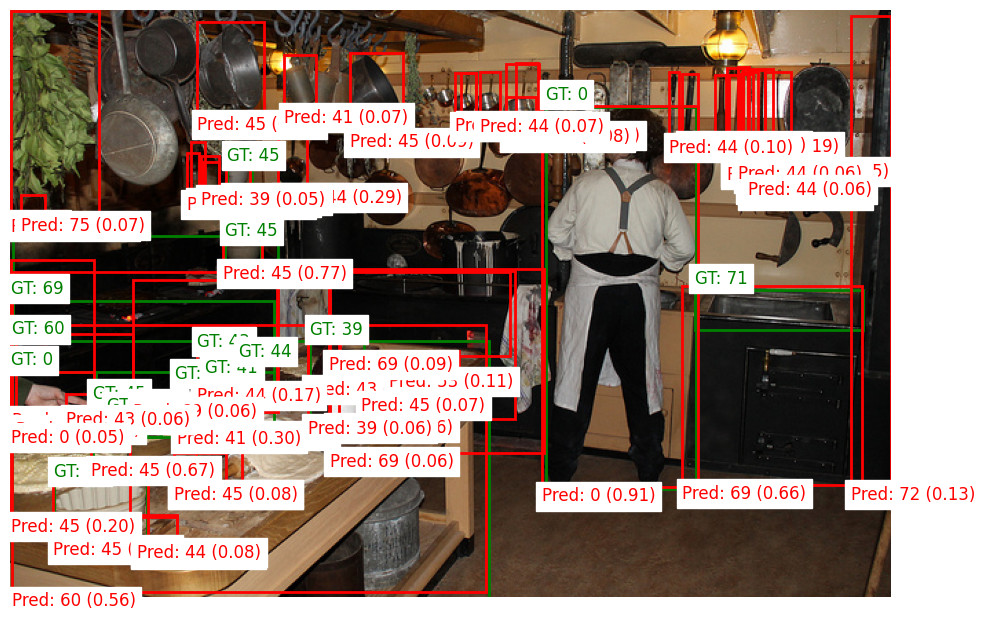

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np
from torchvision.transforms.functional import to_pil_image

# Prikaz jedne slike s detekcijama i ground truth oznakama
def plot_detections_and_ground_truth(image, predictions, gt_boxes, gt_labels, pred_conf, pred_cls):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image)

    # Ground truth (u zelenoj boji)
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"GT: {label}", color='green', fontsize=12, backgroundcolor='white')

    # Predikcije (u crvenoj boji)
    for box, conf, cls in zip(predictions, pred_conf, pred_cls):
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y2 + 10, f"Pred: {int(cls)} ({conf:.2f})", color='red', fontsize=12, backgroundcolor='white')

    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Primjer za prvu sliku
image = to_pil_image(images[0])
pred_boxes = results[0].boxes.xyxy.cpu().numpy()
pred_confs = results[0].boxes.conf.cpu().numpy()
pred_classes = results[0].boxes.cls.cpu().numpy()

gt_boxes = np.array(dataset[0][1]['boxes'])  # lista -> NumPy array
gt_labels = np.array(dataset[0][1]['labels'])

plot_detections_and_ground_truth(image, pred_boxes, gt_boxes, gt_labels, pred_confs, pred_classes)

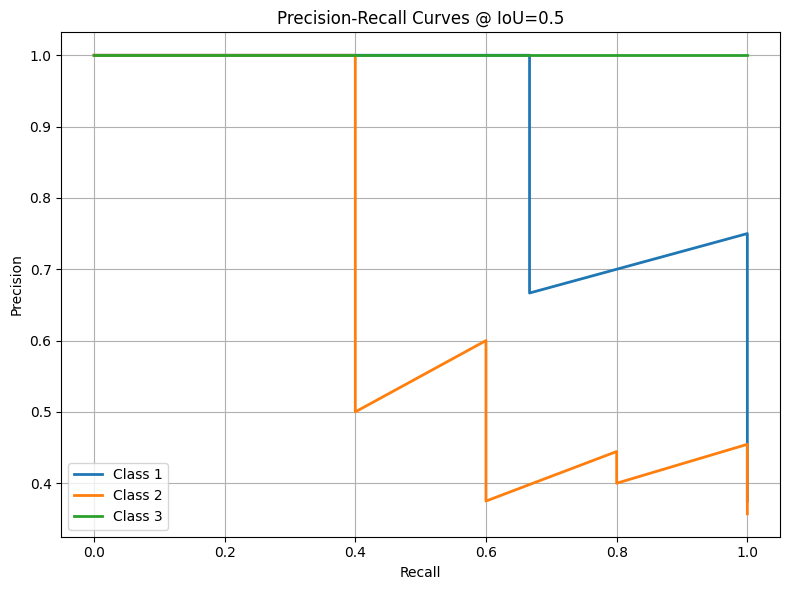

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def iou(box1, box2):
    """
    Compute IoU between two boxes in [x1, y1, x2, y2] format.
    """
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter_area / float(box1_area + box2_area - inter_area + 1e-6)

def plot_precision_recall(results, targets, classes_to_plot, iou_threshold=0.5):
    """
    Plot precision-recall curves for specified classes at a given IoU threshold.

    Parameters:
    - results: list of YOLO inference outputs (each with .boxes.xyxy, .boxes.conf, .boxes.cls)
    - targets: list of ground-truth dicts (each with 'boxes' and 'labels')
    - classes_to_plot: list of COCO class IDs to evaluate (e.g., [1, 2, 3])
    - iou_threshold: float IoU threshold (default 0.5)
    """
    # Prepare containers
    all_scores = {cls: [] for cls in classes_to_plot}
    all_truths = {cls: [] for cls in classes_to_plot}

    # Loop through each image's predictions and ground truth
    for result, target in zip(results, targets):
        pred_boxes  = result.boxes.xyxy.cpu().numpy()
        pred_scores = result.boxes.conf.cpu().numpy()
        pred_labels = result.boxes.cls.cpu().numpy().astype(int)

        gt_boxes  = np.array(target['boxes'])
        gt_labels = np.array(target['labels']).astype(int)

        for cls in classes_to_plot:
            # select GT of this class
            gt_mask      = (gt_labels == cls)
            gt_cls_boxes = gt_boxes[gt_mask]
            gt_used      = np.zeros(len(gt_cls_boxes), dtype=bool)

            # select preds of this class
            pred_mask = (pred_labels == cls)
            for box, score in zip(pred_boxes[pred_mask], pred_scores[pred_mask]):
                if len(gt_cls_boxes) > 0:
                    # compute IoUs
                    ious     = [iou(box, gt) for gt in gt_cls_boxes]
                    best_idx = np.argmax(ious)
                    if ious[best_idx] >= iou_threshold and not gt_used[best_idx]:
                        all_truths[cls].append(1)
                        gt_used[best_idx] = True
                    else:
                        all_truths[cls].append(0)
                else:
                    # no GT for this class in this image
                    all_truths[cls].append(0)
                all_scores[cls].append(score)

    # Plot PR curves
    plt.figure(figsize=(8, 6))
    for cls in classes_to_plot:
        precision, recall, _ = precision_recall_curve(all_truths[cls], all_scores[cls])
        plt.plot(recall, precision, lw=2, label=f"Class {cls}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curves @ IoU={iou_threshold}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ====== Primjer poziva ======
# Pretpostavka: `results` i `targets` su već generirani iz YOLO modela i COCO dataset-a
# Odaberi ID-jeve par klasa koje želiš evaluirati, npr. [1, 2, 3] za person, bicycle, car
classes_to_evaluate = [1, 2, 3]
plot_precision_recall(results, targets, classes_to_evaluate, iou_threshold=0.5)

In [ ]:
def convert_ultralytics_predictions(results):
    formatted = []

    # Implement the function

    return formatted

In [ ]:
import numpy as np

def iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union = area1 + area2 - inter_area
    return inter_area / union if union > 0 else 0

def mean_average_precision(predictions, ground_truths, iou_threshold=0.5, num_classes=80):
    average_precisions = []

    for c in range(num_classes):
        detections = []
        gts = {}

        for pred, gt in zip(predictions, ground_truths):
            img_id = gt['image_id']
            for box, score, label in zip(pred['boxes'], pred['scores'], pred['labels']):
                if label == c:
                    detections.append((img_id, score, box))
            for box, label in zip(gt['boxes'], gt['labels']):
                if label == c:
                    if img_id not in gts:
                        gts[img_id] = []
                    gts[img_id].append({'box': box, 'matched': False})

        detections.sort(key=lambda x: x[1], reverse=True)

        TP = np.zeros(len(detections))
        FP = np.zeros(len(detections))
        total_gt = sum(len(b) for b in gts.values())

        for idx, (img_id, _, pred_box) in enumerate(detections):
            gt_boxes = gts.get(img_id, [])
            best_iou = 0
            best_gt_idx = -1

            for gt_idx, gt in enumerate(gt_boxes):
                iou_val = iou(pred_box, gt['box'])
                if iou_val > best_iou:
                    best_iou = iou_val
                    best_gt_idx = gt_idx

            if best_iou >= iou_threshold:
                if not gt_boxes[best_gt_idx]['matched']:
                    TP[idx] = 1
                    gt_boxes[best_gt_idx]['matched'] = True
                else:
                    FP[idx] = 1
            else:
                FP[idx] = 1

        TP_cumsum = np.cumsum(TP)
        FP_cumsum = np.cumsum(FP)
        precisions = TP_cumsum / (TP_cumsum + FP_cumsum + 1e-6)
        recalls = TP_cumsum / (total_gt + 1e-6)

        recalls = np.array(recalls)
        precisions = np.array(precisions)

        # Step 1: Sort by recall (just in case)


        # Step 2: Interpolate precision to be monotonically decreasing


        # Step 3: Append sentinel values (0 at beginning, 1 at end)


        # Step 4: Area under curve = sum over steps


    return np.mean(average_precisions), average_precisions


## Pomoćne funkcije za 5. zadatak

In [ ]:
def convert_to_coco_format(predictions, image_ids, yolo_idx_to_cat_id):
    coco_preds = []

    for pred, image_id in zip(predictions, image_ids):
        for box, score, cls_idx in zip(pred['boxes'], pred['scores'], pred['labels']):
            x1, y1, x2, y2 = box
            coco_box = [x1, y1, x2 - x1, y2 - y1]  # Convert to COCO format
            coco_preds.append({
                "image_id": int(image_id),
                "category_id": yolo_idx_to_cat_id[cls_idx],
                "bbox": coco_box,
                "score": float(score)
            })

    return coco_preds

In [ ]:
from pycocotools.coco import COCO

coco = COCO('/content/coco/annotations/instances_val2017.json')
cat_ids = coco.getCatIds()
yolo_idx_to_cat_id = {i: cid for i, cid in enumerate(cat_ids)}


In [ ]:
import json

# Use correct image_ids from your dataset
image_ids = [gt['image_id'] for gt in all_ground_truths]
coco_preds = convert_to_coco_format(all_predictions, image_ids, yolo_idx_to_cat_id)

with open("coco_preds.json", "w") as f:
    json.dump(coco_preds, f)


In [ ]:
from pycocotools.cocoeval import COCOeval

# Load ground truth and predictions
coco_gt = COCO('/content/coco/annotations/instances_val2017.json')
coco_dt = coco_gt.loadRes("coco_preds.json")

# Create COCOeval object
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')

# Run evaluation
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()